<a href="https://colab.research.google.com/github/kmeagle1515/STOCK-PREDICT/blob/master/Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import os
import sys
import time
import pandas as pd 
from tqdm._tqdm_notebook import tqdm_notebook
import pickle
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from keras import optimizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import logging
from google.colab import files
import io
from matplotlib import pyplot as plt
import tensorflow as tf

In [3]:
uploaded=files.upload()

Saving stocksdata.csv to stocksdata.csv


In [4]:
df=pd.read_csv(io.BytesIO(uploaded['stocksdata.csv']))
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1/2/1962,0.6277,0.6362,0.6201,0.6201,2575579,0
1,1/3/1962,0.6201,0.6201,0.6122,0.6201,1764749,0
2,1/4/1962,0.6201,0.6201,0.6037,0.6122,2194010,0
3,1/5/1962,0.6122,0.6122,0.5798,0.5957,3255244,0
4,1/8/1962,0.5957,0.5957,0.5716,0.5957,3696430,0


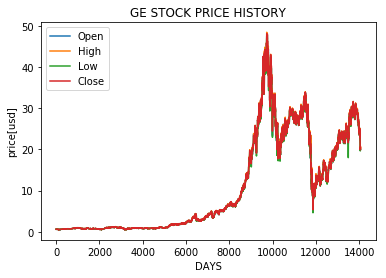

In [5]:
plt.figure()
plt.plot(df["Open"])

plt.plot(df["High"])
plt.plot(df["Low"])
plt.plot(df["Close"])
plt.title('GE STOCK PRICE HISTORY')
plt.xlabel('DAYS')
plt.ylabel('price[usd]')
plt.legend(loc='upper left')
plt.show()

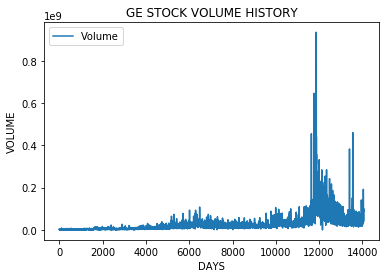

In [6]:
plt.figure()
plt.plot(df['Volume'])
plt.title("GE STOCK VOLUME HISTORY")
plt.xlabel("DAYS")
plt.ylabel("VOLUME")
plt.legend(loc="upper left")
plt.show()

In [0]:
df.isna().sum()

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64

In [7]:
train_cols=["Open","High","Low","Close"]
train_cols1=["Close"]

df_train,df_test=train_test_split(df,train_size=0.8,test_size=0.2,shuffle=False)
print("training and testing dataset size: ",len(df_train),len(df_test))
x=df_train.loc[:,train_cols].values
y=df_train.loc[:,train_cols1].values



min_max_scaler=MinMaxScaler()
X_train=min_max_scaler.fit_transform(x)
print(X_train)
#Y_train=min_max_scaler.fit_transform(y)
Y1_train=X_train[:,2]
Y_train=Y1_train
#Y_train=min_max_scaler.fit_transform(y)

X_test=min_max_scaler.fit_transform(df_test.loc[:,train_cols].values)

training and testing dataset size:  11246 2812
[[0.00356678 0.00352766 0.00358385 0.00338425]
 [0.00340607 0.00319219 0.00341628 0.00338425]
 [0.00340607 0.00319219 0.00323598 0.00321827]
 ...
 [0.56738965 0.56144866 0.56900922 0.56564471]
 [0.56658613 0.5678247  0.56695173 0.57270398]
 [0.57639752 0.57292971 0.57755734 0.57677987]]


In [11]:
lstm_model = Sequential()
lstm_model.add(LSTM(128, batch_input_shape=(batch_size, time_steps, x_t.shape[2]),dropout=0.0, recurrent_dropout=0.0, stateful=True, kernel_initializer='random_uniform'))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(16,activation='relu'))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(1,activation='sigmoid'))
optimizer = optimizers.RMSprop(lr=lr)
lstm_model.compile(loss='mean_squared_error', optimizer=optimizer)
callback_early_stop=EarlyStopping(monitor='val_loss',patience=5,verbose=1)
callback_tensorboard=tf.keras.callbacks.TensorBoard(log_dir='./23_logs/',
                        histogram_freq=0,
                        write_graph=False)
callback_reduce_lr=ReduceLROnPlateau(monitor='val_loss',
                                        patience=0,
                                        verbose=1,
                                        factor=0.1,
                                        min_lr=1e-4)
callbacks = [callback_early_stop,
             callback_tensorboard,
             callback_reduce_lr]

W0620 19:35:11.743395 139737981241216 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0620 19:35:11.757945 139737981241216 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0620 19:35:12.018262 139737981241216 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0620 19:35:12.029498 139737981241216 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Ins


length of time-series i/o (11186, 60, 4) (11186,)



length of time-series i/o (11186, 60, 4) (11186,)
1
60



length of time-series i/o (2752, 60, 4) (2752,)
[0.80376909 0.80685162 0.80541544 ... 0.5169539  0.51240017 0.52991453]
[0.37424688 0.37189996 0.35988511 ... 0.63289898 0.63044697 0.62028864]


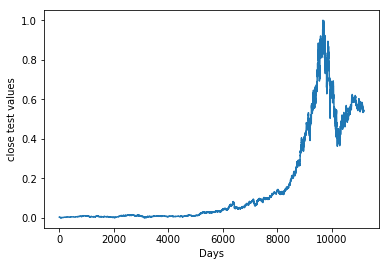

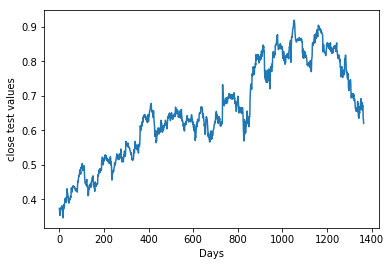

In [9]:
TIME_STEPS=60
BATCH_SIZE=35

def build_timeseries(mat, y_col_index):
    # y_col_index is the index of column that would act as output column
    # total number of time-series samples would be len(mat) - TIME_STEPS
   
    dim_0 = mat.shape[0] - TIME_STEPS
    dim_1 = mat.shape[1]
  
    x = np.zeros((dim_0, TIME_STEPS, dim_1))
    y = np.zeros((dim_0,))
    
    for i in tqdm_notebook(range(dim_0)):
        #print(i)
        x[i] = mat[i:TIME_STEPS+i]
        y[i] = mat[TIME_STEPS+i, y_col_index]
    print("length of time-series i/o",x.shape,y.shape)
    return x, y
build_timeseries(X_train, 3)

def trim_dataset(mat, batch_size):
    """
    trims dataset to a size that's divisible by BATCH_SIZE
    """
    no_of_rows_drop = mat.shape[0]%batch_size
    if(no_of_rows_drop > 0):
        return mat[:-no_of_rows_drop]
    else:
        return mat

x_t, y_t = build_timeseries(X_train, 3)

x_t = trim_dataset(x_t, BATCH_SIZE)
print(1)
print(x_t.shape[1])
y_t = trim_dataset(y_t, BATCH_SIZE)
x_temp, y_temp = build_timeseries(X_test, 3)

print(y_temp)
x_val, x_test_t = np.split(trim_dataset(x_temp, BATCH_SIZE),2)
y_val, y_test_t = np.split(trim_dataset(y_temp, BATCH_SIZE),2)
print(y_test_t)
plt.figure()
plt.plot(y_t)
plt.xlabel('Days')
plt.ylabel('close test values')
plt.show()
plt.figure()
plt.plot(y_test_t)
plt.xlabel('Days')
plt.ylabel('close test values')
plt.show()


In [13]:
batch_size=BATCH_SIZE
time_steps=TIME_STEPS
lr=0.005
epochs=150
history = lstm_model.fit(x_t, y_t, epochs=150, verbose=2, batch_size=BATCH_SIZE,
                    shuffle=False, validation_data=(trim_dataset(x_val, BATCH_SIZE),
                    trim_dataset(y_val, BATCH_SIZE)),callbacks=callbacks)


W0620 19:35:33.553143 139737981241216 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 11165 samples, validate on 1365 samples
Epoch 1/150


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.172206). Check your callbacks.
  % delta_t_median)


 - 29s - loss: 0.0067 - val_loss: 0.0739
Epoch 2/150
 - 29s - loss: 0.0139 - val_loss: 0.0691
Epoch 3/150
 - 28s - loss: 0.0142 - val_loss: 0.0702

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
Epoch 4/150
 - 28s - loss: 0.0411 - val_loss: 0.0674
Epoch 5/150
 - 28s - loss: 0.0148 - val_loss: 0.0493
Epoch 6/150
 - 28s - loss: 0.0104 - val_loss: 0.0327
Epoch 7/150
 - 28s - loss: 0.0092 - val_loss: 0.0298
Epoch 8/150
 - 28s - loss: 0.0081 - val_loss: 0.0315

Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.0001.
Epoch 9/150
 - 28s - loss: 0.0092 - val_loss: 0.0189
Epoch 10/150
 - 28s - loss: 0.0061 - val_loss: 0.0117
Epoch 11/150
 - 28s - loss: 0.0056 - val_loss: 0.0114
Epoch 12/150
 - 28s - loss: 0.0053 - val_loss: 0.0092
Epoch 13/150
 - 28s - loss: 0.0052 - val_loss: 0.0080
Epoch 14/150
 - 28s - loss: 0.0052 - val_loss: 0.0088
Epoch 15/150
 - 28s - loss: 0.0050 - val_loss: 0.0056
Epoch 16/150
 - 28s - loss: 0.0050 - val_loss: 0.0062
Epoch 17/1

In [14]:
batch_size=35
y_pred=lstm_model.predict(
    x_test_t,
    batch_size=batch_size,
    verbose=2
 )
mean_squared_error(y_test_t, y_pred)

0.0010752087242004117

[[0.3942525 ]
 [0.39277822]
 [0.39105248]
 ...
 [0.65342075]
 [0.65254194]
 [0.64997673]]


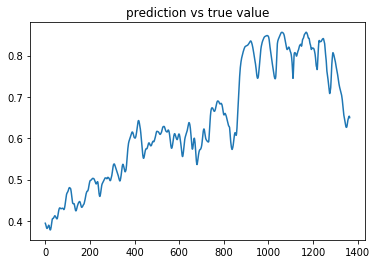

[0.37424688 0.37189996 0.35988511 ... 0.63289898 0.63044697 0.62028864]


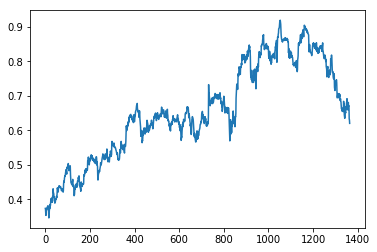

In [15]:
plt.figure()
plt.title("prediction vs true value")
plt.plot(y_pred)
print(y_pred)
plt.show()
plt.plot(y_test_t)
print(y_test_t)
plt.show()